### Bloco 2 | Projeto de Experiência
### Primeira Entrega (N1) - FASE 2

####  - Nome: Kauê Cabrera Rosalem
####  - Disciplina: Projeto de Experiência
####  - Projeto: FASE 2 - Desvendando crimes na cidade de Boston

### Importação das Bibliotecas Principais

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import pylab as pl
import numpy as np 
import scipy.optimize as opt
from sklearn import preprocessing

### Importação da Base de Dados

Lendo o arquivo csv com registros separados por ";" e criando uma base de dados:

In [2]:
data_base = pd.read_csv('crimes_2.csv', ";")
data_base.head()

,NUMERO_INCIDENTE,CODIGO_CRIME,CODIGO_GRUPO_CRIME,DESCRICAO_CRIME,DISTRITO,AREA_REPORTADA,TEVE_TIRO,DATA_OCORRENCIA,ANO,MES,DIA_DA_SEMANA,HORA,ALTO_RISCO
0,I182070933,724,Auto Theft,AUTO THEFT,B2,330,0,03/09/18 21:25,2018,9,Monday,21,0.0
1,I182070932,3301,Verbal Disputes,VERBAL DISPUTE,B2,584,0,03/09/18 20:39,2018,9,Monday,20,0.0
2,I182070917,2647,Other,THREATS TO DO BODILY HARM,B2,901,0,03/09/18 19:52,2018,9,Monday,19,0.0
3,I182070915,614,Larceny From Motor Vehicle,LARCENY THEFT FROM MV - NON-ACCESSORY,B2,181,0,02/09/18 18:00,2018,9,Sunday,18,0.0
4,I182070908,522,Residential Burglary,BURGLARY - RESIDENTIAL - NO FORCE,B2,911,0,03/09/18 18:38,2018,9,Monday,18,0.0


### Pré-Processamento

Verificando quantidade total de registros e atributos:

In [3]:
data_base.shape

(9823, 13)

Verificando a quantidade de valores nulos por atributo:

In [4]:
data_base.isnull().sum()

NUMERO_INCIDENTE      0
CODIGO_CRIME          0
CODIGO_GRUPO_CRIME    0
DESCRICAO_CRIME       0
DISTRITO              0
AREA_REPORTADA        0
TEVE_TIRO             0
DATA_OCORRENCIA       0
ANO                   0
MES                   0
DIA_DA_SEMANA         0
HORA                  0
ALTO_RISCO            1
dtype: int64

Eliminando o único valor nulo no atributo ALTO_RISCO, o qual é de interesse na fase 2 do projeto:

In [5]:
data_base_full = data_base.dropna()

Verificando quantidade de registros e atributos na base de dados tratada:

In [6]:
data_base_full.shape

(9822, 13)

### Manipulação da Base

Base de dados com apenas os atributos a serem analisados na fase 2 do projeto:

In [7]:
fase2 = data_base_full.drop(columns=["CODIGO_GRUPO_CRIME", "DATA_OCORRENCIA", "DESCRICAO_CRIME", "DISTRITO"]) 

fase2.head() # base de dados da fase 2

,NUMERO_INCIDENTE,CODIGO_CRIME,AREA_REPORTADA,TEVE_TIRO,ANO,MES,DIA_DA_SEMANA,HORA,ALTO_RISCO
0,I182070933,724,330,0,2018,9,Monday,21,0.0
1,I182070932,3301,584,0,2018,9,Monday,20,0.0
2,I182070917,2647,901,0,2018,9,Monday,19,0.0
3,I182070915,614,181,0,2018,9,Sunday,18,0.0
4,I182070908,522,911,0,2018,9,Monday,18,0.0


Verificando o número de crimes por grau de risco:

In [8]:
fase2["ALTO_RISCO"].value_counts()

0.0    8890
1.0     932
Name: ALTO_RISCO, dtype: int64

Verificando o número de crimes por área reportada:

In [9]:
fase2["AREA_REPORTADA"].value_counts()

0      702
329    407
282    277
311    255
330    247
      ... 
572      1
61       1
277      1
285      1
124      1
Name: AREA_REPORTADA, Length: 122, dtype: int64

Verificando o número de crimes por mês:

In [10]:
fase2["MES"].value_counts()

6     1358
5     1300
7     1290
4     1225
8     1218
3     1187
1     1094
2     1020
9      102
12      17
10       6
11       5
Name: MES, dtype: int64

Verificando o número de crimes por dias da semana:

In [11]:
fase2["DIA_DA_SEMANA"].value_counts()

Friday       1517
Wednesday    1511
Thursday     1431
Tuesday      1421
Monday       1386
Saturday     1358
Sunday       1198
Name: DIA_DA_SEMANA, dtype: int64

Verificando o número de crimes por hora:

In [12]:
fase2["HORA"].value_counts()

18    618
16    588
17    588
12    578
14    569
11    557
19    516
15    514
13    498
20    494
21    482
10    461
0     443
9     420
22    415
8     365
23    364
1     294
7     278
2     243
6     175
3     145
4     110
5     107
Name: HORA, dtype: int64

### Resultados estatísticos/analíticos

Gráfico de pizza para análise da porcentagem de crimes por grau de risco (zero ou um):

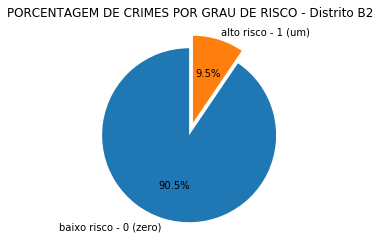

In [30]:
legenda_risco = 'baixo risco - 0 (zero)', 'alto risco - 1 (um)'
fatias = (0.05, 0.1)
valores_risco = fase2["ALTO_RISCO"].value_counts()
plt.pie(valores_risco, explode = fatias, labels = legenda_risco, autopct='%1.1f%%', startangle=90)
plt.title('PORCENTAGEM DE CRIMES POR GRAU DE RISCO - Distrito B2')
plt.savefig('fase2_1.png', format='png')
plt.show()

Gráfico de barras para análise do número de crimes em 2018 por grau de risco ao considerar o distrito B2:

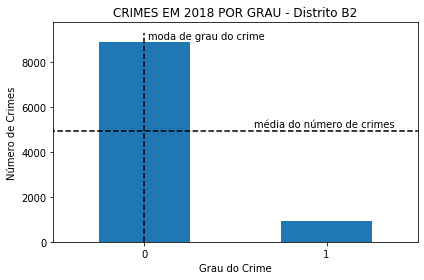

In [31]:
alto_risco = fase2["ALTO_RISCO"]
alto_risco.value_counts().plot.bar()
plt.xticks(rotation=0)
plt.xticks()
plt.yticks()
plt.xlabel('Grau do Crime')
plt.ylabel('Número de Crimes')
plt.title('CRIMES EM 2018 POR GRAU - Distrito B2')

media_crimes = data_base["ALTO_RISCO"].value_counts().mean()
plt.hlines(media_crimes, -1,2, linestyles='dashed')
plt.annotate('média do número de crimes',(0.6, media_crimes+200))

media_grau = data_base["ALTO_RISCO"].mode()
plt.vlines(media_grau, 0,9300, linestyles='dashed')
plt.annotate('moda de grau do crime',(0.02, media_grau+9000))
plt.savefig('fase2_2.png', format='png')
plt.tight_layout()

### Modelo Preditivo

#### Nome da Tecnica: Regressão Logística
#### Referências Bibliográficas: 
1. IBM. (Produtor). Introdução à classificação [Arquivo de vídeo], 2018.
2. IBM. (Produtor). Introdução à regressão logística [Arquivo de vídeo], 2018.
3. IBM. (Produtor). Regressão logística vs. linear [Arquivo de vídeo], 2018.

In [15]:
fase2.head()

,NUMERO_INCIDENTE,CODIGO_CRIME,AREA_REPORTADA,TEVE_TIRO,ANO,MES,DIA_DA_SEMANA,HORA,ALTO_RISCO
0,I182070933,724,330,0,2018,9,Monday,21,0.0
1,I182070932,3301,584,0,2018,9,Monday,20,0.0
2,I182070917,2647,901,0,2018,9,Monday,19,0.0
3,I182070915,614,181,0,2018,9,Sunday,18,0.0
4,I182070908,522,911,0,2018,9,Monday,18,0.0


Seleção dos dados numéricos para aplicação da regressão logística:

In [16]:
fase2 = fase2[['CODIGO_CRIME', 'AREA_REPORTADA','TEVE_TIRO', 'ANO', 'MES', 'HORA', 'ALTO_RISCO']]
fase2['ALTO_RISCO'] = fase2['ALTO_RISCO'].astype('int')
fase2.head() # seleção dos dados numéricos

,CODIGO_CRIME,AREA_REPORTADA,TEVE_TIRO,ANO,MES,HORA,ALTO_RISCO
0,724,330,0,2018,9,21,0
1,3301,584,0,2018,9,20,0
2,2647,901,0,2018,9,19,0
3,614,181,0,2018,9,18,0
4,522,911,0,2018,9,18,0


Definição do conjunto de dados para aplicação da regressão logística:

In [17]:
X = np.asarray(fase2[['CODIGO_CRIME', 'AREA_REPORTADA','TEVE_TIRO', 'ANO', 'MES', 'HORA']])
X[0:5] # definição do conjunto de dados

array([[ 724,  330,    0, 2018,    9,   21],
       [3301,  584,    0, 2018,    9,   20],
       [2647,  901,    0, 2018,    9,   19],
       [ 614,  181,    0, 2018,    9,   18],
       [ 522,  911,    0, 2018,    9,   18]], dtype=int64)

In [18]:
y = np.asarray(fase2['ALTO_RISCO'])
y[0:5] # definição do conjunto de dados

array([0, 0, 0, 0, 0])

Normalização do conjunto de dados:

In [19]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5] # normalização do conjunto de dados

array([[-1.45084244,  0.05119122, -0.08225003,  0.07080829,  1.86298986,
         1.23273554],
       [ 0.77428389,  1.56755572, -0.08225003,  0.07080829,  1.86298986,
         1.07490965],
       [ 0.20958361,  3.46002637, -0.08225003,  0.07080829,  1.86298986,
         0.91708377],
       [-1.54582261, -0.83832968, -0.08225003,  0.07080829,  1.86298986,
         0.75925788],
       [-1.62526057,  3.51972576, -0.08225003,  0.07080829,  1.86298986,
         0.75925788]])

Treinamento e teste do conjunto de dados:

In [20]:
from sklearn.model_selection import train_test_split # treinamento e teste do conjunto de dados
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (7857, 6) (7857,)
Test set: (1965, 6) (1965,)


Aplicação da regressão logística com uso do recurso Scikit-learn:

In [21]:
from sklearn.linear_model import LogisticRegression # regressão logística com Scikit-learn
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [22]:
yhat = LR.predict(X_test) # previsão através do conjunto de teste
yhat

array([0, 0, 0, ..., 0, 0, 0])

In [23]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob # primeira coluna é a probabilidade da classe 1 e a segunda coluna é a probabilidade da classe 0

array([[0.92483323, 0.07516677],
       [0.70061832, 0.29938168],
       [0.85888756, 0.14111244],
       ...,
       [0.9338571 , 0.0661429 ],
       [0.95499077, 0.04500923],
       [0.73776581, 0.26223419]])

Determinação do índice de Jaccard:

In [24]:
from sklearn.metrics import jaccard_similarity_score # avaliação da precisão com o índice de Jaccard
jaccard_similarity_score(y_test, yhat) # melhor precisão do subconjunto será 1.0 caso contrário será 0.0

C:\Users\kauerosalem\anaconda3\lib\site-packages\sklearn\metrics\classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


0.9048346055979644

Cálculo dos valores da matriz de confusão:

In [25]:
from sklearn.metrics import classification_report, confusion_matrix # desenvolvimento da matriz de confusão
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Spectral):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                horizontalalignment="center",
                 color="white")# if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Valor Verdadeiro (confirmado por análise)')
    plt.xlabel('Valor Previsto (predito pelo teste)')
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[   3  181]
 [   6 1775]]


Gráfico da matriz de confusão não-normalizada:

Confusion matrix, without normalization
[[   3  181]
 [   6 1775]]


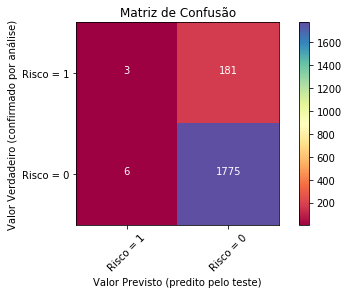

In [32]:
# Computando a matriz de confusão
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)

# Plote da matriz de confusão não-normalizada
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Risco = 1','Risco = 0'],normalize = False,  title='Matriz de Confusão')
plt.savefig('fase2_3.png', format='png')

Gráfico da matriz de confusão normalizada:

Normalized confusion matrix
[[0.02 0.98]
 [0.   1.  ]]


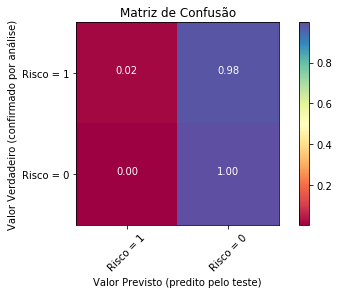

In [33]:
# Plote da matriz de confusão normalizada
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Risco = 1','Risco = 0'],normalize = True,  title='Matriz de Confusão')
plt.savefig('fase2_4.png', format='png')

Precisão, revocação e média hamônica:

In [28]:
print (classification_report(y_test, yhat)) 
# A precisão (precision) é uma medida da exatidão: precisão = TP / (TP + FP)
# A revocação (recall) é a taxa de verdadeiros positivos: revocação = TP / (TP + FN)
# F1 é a média harmônica da precisão e da revocação; seu melhor valor em 1 (precisão e revocação perfeitas) e o pior em 0

              precision    recall  f1-score   support

           0       0.91      1.00      0.95      1781
           1       0.33      0.02      0.03       184

    accuracy                           0.90      1965
   macro avg       0.62      0.51      0.49      1965
weighted avg       0.85      0.90      0.86      1965



In [29]:
from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob)
# Log loss (perda logarítmica) mede o desempenho de um classificador: probabilidade entre 0 e 1

0.2722905996560797

### Análises e Conclusões

Na fase 2 do projeto "Desvendando crimes na cidade de Boston" verificou-se inicialmente o número de crimes por grau de risco e a porcentagem relativa entre as classificações zero e um. Para uma análise estatística, apresentou-se no gráfico de barras a média de crimes e a moda referente ao grau de risco, a qual é dada pelo grau zero. Um modelo preditivo, dado pela regressão logística, foi aplicado à base de dados do distrito B2, a qual é composta pelos seguintes atributos: código do crime; área reportada; teve tiro; ano; mês; hora; alto risco. Para análise deste modelo, utilizou-se uma matriz de confusão com referência ao grau de risco dos crimes, o qual se apresenta com valores binários (zero e um). A matriz de confusão foi obtida de forma não-normalizada e normalizada para uma completa análise dos dados. De acordo com a matriz de confusão: o modelo classificou 3 crimes como grau 1 (um) e que realmente eram de grau 1 (um); o modelo classificou 181 crimes como grau 0 (zero) que na verdade eram de grau 1 (um); o modelo classificou 6 crimes como grau 1 (um) que na verdade eram de grau 0 (zero); o modelo classificou 1775 crimes como grau 0 (zero) que realmente eram de grau 0 (zero).